# This is my solution of the JEM207 midterm
Jachym Svejda,
UKČO: 62263721

Import necessary packages:

In [2]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import datetime

Part 1

In [22]:
AMGN = pd.read_csv("data/AMGN.csv", parse_dates=['Date'], date_parser=lambda d: pd.to_datetime(d, format='ISO8601'))
BA = pd.read_csv("data/BA.csv")
MRO =pd.read_csv("data/MRO.csv")
WYNN = pd.read_csv("data/WYNN.csv")

/var/folders/zr/40yfwjmx6dqbjgkj5v1_d8r80000gn/T/ipykernel_35185/2285005259.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  AMGN = pd.read_csv("data/AMGN.csv", parse_dates=['Date'], date_parser=lambda d: pd.to_datetime(d, format='ISO8601'))


1. Is there a company that has no difference between the Close and Adj Close columns?
What does it mean from the financial point of view for the stock (you can get bonus
partial points)?

In [33]:
AMGN["close_diff"] = AMGN["Close"] - AMGN["Adj Close"]
BA["close_diff"] = BA["Close"] - BA["Adj Close"]
MRO["close_diff"] = MRO["Close"] - MRO["Adj Close"]
WYNN["close_diff"] = WYNN["Close"] - WYNN["Adj Close"]

In [34]:
AMGN.close_diff.sum(), BA.close_diff.sum(), MRO.close_diff.sum(), WYNN.close_diff.sum()

(17467.891876220703, 5281.540069580078, 444.65273737907404, 3116.939598083496)

None of the values above are zero hence there is no company that has no difference between the Close and Adj Close columns.

While closing price merely refers to the cost of shares at the end of the day, the adjusted closing price considers other factors like dividends, stock splits, and new stock offerings. I.e. we can assume that the companies pay e.g. dividiend etc.

2. What is the highest and lowest price (Adj Close) each company recorded?

In [35]:
#AMGN:
AMGN["Adj Close"].max(), AMGN["Adj Close"].min()

(292.3900146484375, 145.319580078125)

In [36]:
#BA
BA["Adj Close"].max(), BA["Adj Close"].min()

(430.2999877929687, 95.01000213623048)

In [37]:
#MRO:
MRO["Adj Close"].max(), MRO["Adj Close"].min()

(33.029998779296875, 3.048149585723877)

In [39]:
#WYNN:
WYNN["Adj Close"].max(), WYNN["Adj Close"].min()

(190.35609436035156, 43.02000045776367)

3. (1pt task) Calculate logarithmic returns from Adj Close. For each company report on
its, min, man, mean, median of the return distribution.

In [43]:
AMGN["log_adj_close"] = AMGN["Adj Close"].apply(np.log)
AMGN["log_adj_close"].agg([min, max, np.mean, np.median])

min       4.978935
max       5.678089
mean      5.295582
median    5.340335
Name: log_adj_close, dtype: float64

In [44]:
BA["log_adj_close"] = BA["Adj Close"].apply(np.log)
BA["log_adj_close"].agg([min, max, np.mean, np.median])

min       4.553982
max       6.064483
mean      5.496171
median    5.485834
Name: log_adj_close, dtype: float64

In [45]:
MRO["log_adj_close"] = MRO["Adj Close"].apply(np.log)
MRO["log_adj_close"].agg([min, max, np.mean, np.median])

min       1.114535
max       3.497416
mean      2.570115
median    2.649175
Name: log_adj_close, dtype: float64

In [46]:
WYNN["log_adj_close"] = WYNN["Adj Close"].apply(np.log)
WYNN["log_adj_close"].agg([min, max, np.mean, np.median])

min       3.761665
max       5.248896
mean      4.644299
median    4.684988
Name: log_adj_close, dtype: float64

4. When did each company record the highest gain and highest loss for the day?
(logarithmic loss). Hint: idxmax

In [56]:
amgn_top_gain = AMGN["log_adj_close"].max()
amgn_top_loss = AMGN["log_adj_close"].min()
AMGN.loc[AMGN["log_adj_close"] == amgn_top_gain]["Date"],AMGN.loc[AMGN["log_adj_close"] == amgn_top_loss]["Date"]

(1255   2022-11-08
 Name: Date, dtype: datetime64[ns],
 94   2018-04-02
 Name: Date, dtype: datetime64[ns])

In [57]:
ba_top_gain = BA["log_adj_close"].max()
ba_top_loss = BA["log_adj_close"].min()
BA.loc[BA["log_adj_close"] == ba_top_gain]["Date"],BA.loc[BA["log_adj_close"] == ba_top_loss]["Date"]

(324    2019-03-01
 Name: Date, dtype: object,
 590    2020-03-20
 Name: Date, dtype: object)

In [58]:
mro_top_gain = MRO["log_adj_close"].max()
mro_top_loss = MRO["log_adj_close"].min()
MRO.loc[MRO["log_adj_close"] == mro_top_gain]["Date"],MRO.loc[MRO["log_adj_close"] == mro_top_loss]["Date"]

(1254    2022-11-07
 Name: Date, dtype: object,
 598    2020-04-01
 Name: Date, dtype: object)

In [59]:
wynn_top_gain = WYNN["log_adj_close"].max()
wynn_top_loss = WYNN["log_adj_close"].min()
WYNN.loc[WYNN["log_adj_close"] == wynn_top_gain]["Date"],WYNN.loc[WYNN["log_adj_close"] == wynn_top_loss]["Date"]

(122    2018-05-10
 Name: Date, dtype: object,
 588    2020-03-18
 Name: Date, dtype: object)

5. What is the average calendar weekly volume for each company? Hint: check how to
resample pandas DF

6. Which company recorded the highest total return over the whole period?

In [72]:
AMGN["return"] = AMGN["Close"] - AMGN["Open"]
amgn_return = AMGN["return"].sum()
BA["return"] = BA["Close"] - BA["Open"]
ba_return = BA["return"].sum()
MRO["return"] = MRO["Close"] - MRO["Open"]
mro_return = MRO["return"].sum()
WYNN["return"] = WYNN["Close"] - WYNN["Open"]
wynn_return = WYNN["return"].sum()

total_returns = [amgn_return, ba_return, mro_return, wynn_return]
for i in range(len(total_returns)):
    if total_returns[i] == max(amgn_return, ba_return, mro_return, wynn_return):
        print(i)



0


Since we got index zero, we can see that the highest total return over the whole period has company AMGN

7. Plot the log-returns of the companies (ideally in the same plot)

In [73]:
AMGN["log_return"] = AMGN["return"].apply(np.log)
BA["log_return"] = BA["return"].apply(np.log)
MRO["log_return"] = MRO["return"].apply(np.log)
WYNN["log_return"] = WYNN["return"].apply(np.log)

<Axes: >

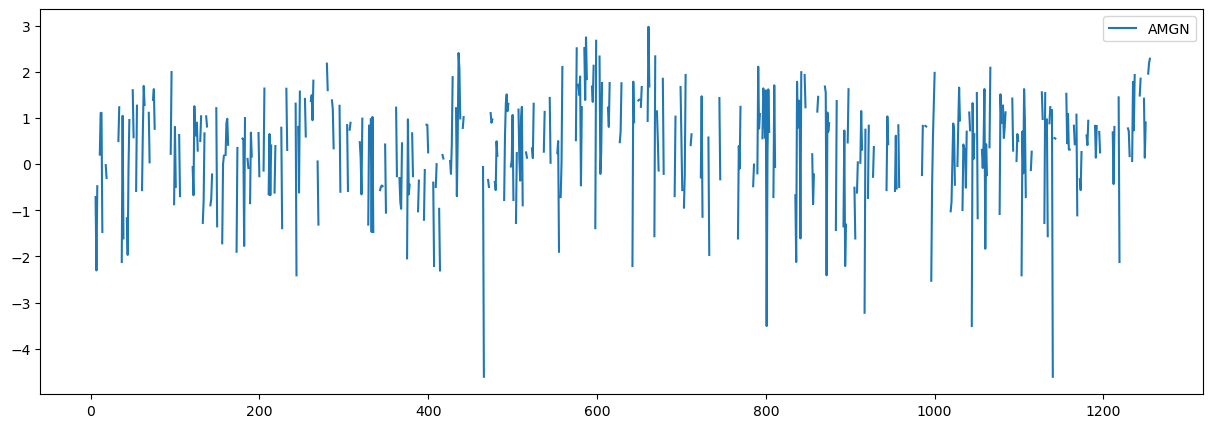

In [78]:
AMGN["log_return"].plot(figsize = (15,5), label = "AMGN", legend = True)